## Problem Definition


Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning.One of the main areas of research in machine learning is the analysis of water quality. It is also known as water potability analysis because our task here is to understand all the factors that affect water potability and train a machine learning model that can classify whether a specific water sample is safe or unfit for consumption.

##  Data Preparation
For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption. You can download the dataset I’m using for the water quality analysis task: https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv

## Importing the necessary libraries

we will kickstart our project by importing the neccessary libraries.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/filename/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


I can see null values in the first preview of this dataset itself, so before we go ahead, let’s remove all the rows that contain null values:

In [2]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The Potability column of this dataset is the column we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. So let’s see the distribution of 0 and 1 in the Potability column:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


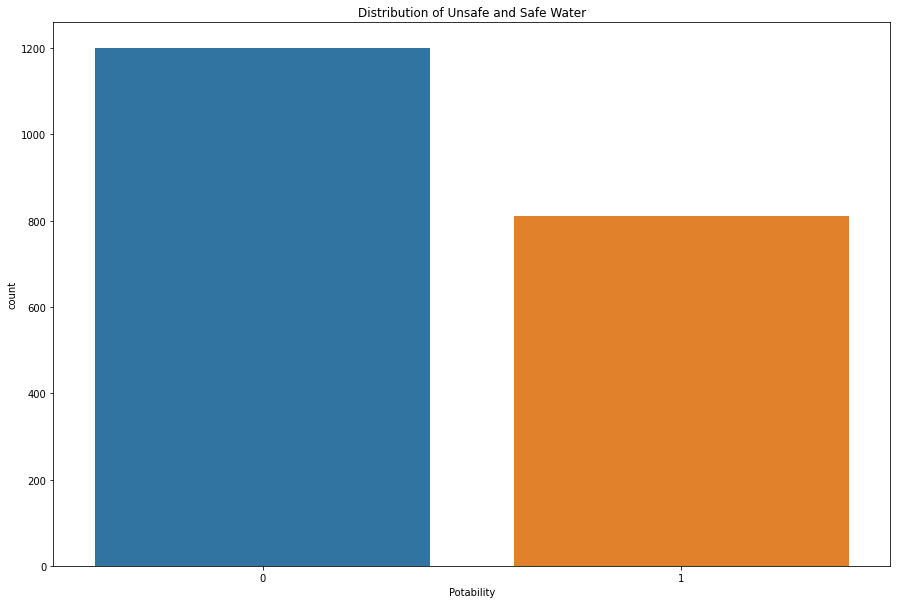

In [4]:
plt.figure(figsize=(15, 10))
sns.countplot(data.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show();

So this is something you should note that this dataset is not balanced because samples of 0s are more than 1s.
As mentioned above, there are no factors that we cannot ignore that affect water quality, so let’s explore all the columns one by one. Let’s start by looking at the ph column:

In [5]:

import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. Now let’s look at the second factor affecting water quality in the dataset:

In [6]:
figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

The figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. Now let’s take a look at the next factor affecting water quality:

In [7]:
figure = px.histogram(data, x = "Solids", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now let’s take a look at the next factor affecting water quality:

In [8]:
figure = px.histogram(data, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems. Now let’s take a look at the next factor affecting water quality:

In [9]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink. Now let’s see the next factor:



In [10]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable. Now let’s see the next factor:

In [11]:

figure = px.histogram(data, x = "Organic_carbon", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

The figure above represents the distribution of organic carbon in water in the dataset. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink. Now let’s take a look at the next factor that affects the quality of drinking water:

In [12]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

The figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink. Now let’s take a look at the next factor in the dataset that affects drinking water quality:

In [13]:
figure = px.histogram(data, x = "Turbidity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

The figure above represents the distribution of turbidity in water. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable

## Water Quality Prediction Model
In the above section, we explored all the features that affect water quality. Now, the next step is to train a machine learning model for the task of water quality analysis using Python. For this task, I will be using the PyCaret library in Python. So we have to install it first in our notebook.

In [20]:
!pip install NumPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.24.1 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
pandas-profiling 3.6.3 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.1 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.


In [22]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1

Before training a machine learning model, let’s have a look at the correlation of all the features with respect to the Potability column in the dataset:

In [23]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [24]:
from pycaret.classification import *
clf = setup(data, target = "Potability", silent = True, session_id = 786)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6830,0.7005,0.4197,0.6744,0.5133,0.2976,0.3182,0.756
qda,Quadratic Discriminant Analysis,0.6823,0.7192,0.3985,0.6883,0.5013,0.2917,0.3174,0.030
et,Extra Trees Classifier,0.6816,0.6941,0.3861,0.6858,0.4916,0.2863,0.3123,0.277
lightgbm,Light Gradient Boosting Machine,0.6652,0.6916,0.4762,0.6078,0.5324,0.2781,0.2840,0.181
gbc,Gradient Boosting Classifier,0.6602,0.6735,0.3718,0.6306,0.4667,0.2419,0.2603,0.356
nb,Naive Bayes,0.6184,0.6078,0.2478,0.5545,0.3412,0.1261,0.1462,0.038
dt,Decision Tree Classifier,0.6034,0.5895,0.5186,0.5049,0.5097,0.1775,0.1784,0.050
lr,Logistic Regression,0.5984,0.5199,0.0071,0.1900,0.0134,0.0028,0.0127,0.710
ridge,Ridge Classifier,0.5984,0.0000,0.0089,0.1583,0.0168,0.0035,0.0056,0.021
dummy,Dummy Classifier,0.5984,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)

According to the above result, the random forecast classification algorithm is best for training a machine learning model for the task of water quality analysis. So let’s train the model and examine its predictions:

In [26]:
model = create_model("rf")
predict = predict_model(model, data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7376,0.7545,0.4737,0.7941,0.5934,0.4174,0.4478
1,0.6525,0.6687,0.3860,0.6111,0.4731,0.2331,0.2468
2,0.6879,0.7056,0.4386,0.6757,0.5319,0.3134,0.3299
3,0.6738,0.7172,0.3684,0.6774,0.4773,0.2691,0.2955
4,0.6667,0.6885,0.3158,0.6923,0.4337,0.2417,0.2791
5,0.6312,0.6404,0.3929,0.5500,0.4583,0.1904,0.1966
6,0.7092,0.7192,0.5357,0.6667,0.5941,0.3717,0.3771
7,0.6786,0.6988,0.5000,0.6222,0.5545,0.3077,0.3122
8,0.7071,0.7090,0.3750,0.7778,0.5060,0.3322,0.3769


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.904,0.9691,0.8237,0.9304,0.8738,0.7968,0.8007


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Label,Score
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0.87
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0.91
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,0.83
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,0.89
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,0.94


The above results are looking satisfactory. I hope you liked this Machine Learning project on Water Quality Analysis using Python.

## Conclusion
So this is how you can analyze the quality of water and train a machine learning model to classify safe and unsafe water for drinking. Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning.